# Introduction to neural network classification

In this notebook we're going to learn how to write neural networks for classification

A classification is where you try to classify something as one thing or another

## What is a classification problem?

There are three types of classification problem
1. Binary classification
2. Multiclass classification
3. Multilabel classification

## Architecture of a classification model

```
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
  tf.keras.Input(shape(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])
```

```
# 2. Compile the model
model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)
```

```
# 3. Fit the model
model.fit(X_train, y_train, epochs=5)
```

```
# 4. Evaluate the model
model.evaluate(X_test, y_test)
```

|Hyperparamter|Binary Classification|Multiclass classification|
|---|---|---|
|Input layer shape| Same as number of features (e.g 5 for age, sex, height, weight, smoking status in heart disease prediction| Same as binary classification|
|Hidden layer(s)|Problem specific, minimum = 1, maximum=unlimited|Same as binary classification|
|Neurons per hidden layer|Problem specific, generally 10 to 100| Same as binary classification|
|Output layer shape|1 (one class or other)|1 per class (e.g 3 for food, person, or dog photo|
|Hidden activation|Usually ReLU (retified liner unit)|Same as binary classification|
|Output activation|Sigmoid|Softmax|
|Loss function|Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)| Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer| SGD (stochastic gradient descent)Adam|Same as binary classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


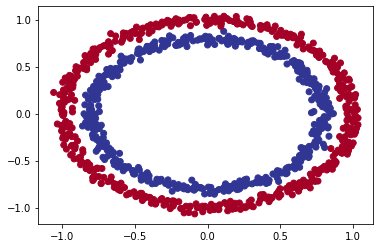

In [5]:
# Visualizer with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 **Exercise:** Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/) building and running different neural networks. See what happens when you change different hyperparameters

## Input and output shapes


In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the forst example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.11.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)


# 1. Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_1.fit(X, y, epochs=5, verbose=0)

In [11]:
# Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 5.1791 - accuracy: 0.4750


[5.17912483215332, 0.4749999940395355]

In [12]:
# Let's try and improve the model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.5146 - accuracy: 0.4690


[4.514585494995117, 0.4690000116825104]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it is guessing

So let's step things up a notch and add an extra layers.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.8064 - accuracy: 0.4750


[0.8064496517181396, 0.4749999940395355]



```
# This is formatted as code
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
[0.6945405602455139, 0.5]
```



## Improving our model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - we might to add the more layers or increase the number of hidden units
2. Compiling a model - here we might to choose a different optimization function such as Adam
3. Fitting a model perhaps we might fit our model for more epochs

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [15]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5070


[0.7003427743911743, 0.5070000290870667]

🔑 **Note** Whenever your model is performing strangely or there's something going on with your data you're not quite sure if, remember these three words **visualize**, **visualize**, **visualize**. Inspect your data, inspect your model, inspect your model's prediction

To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions accross the meshgrid
* Plot the prediction as well as a line btw zones (where each unique class falls)

In [16]:
# Import numpy
import numpy as np

In [17]:
# def plot_decision_boundary(model, X, y):
#   """
#   Plot the decision boundary created by a model predicting on X

#   Resources:
#     1.https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
#   """
#   # define the axis boundaries of the plot and create a meshgrid
#   x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#   y_min, y_max = X[:, 1].max() - 0.1, X[:, 1].max() + 0.1
#   xx, yy = np.meshgrid(
#       np.linspace(x_min, x_max, 100), 
#       np.linspace(y_min, y_max, 100)
#   )
#   # create X value (we're going to make predictions on these)
#   x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

#   # Make predictions
#   y_pred = model.predict(x_in)

#   # Check for multi-class
#   if model.output_shape[-1] > 1:
#     print("doing multiclass classification")
#     # we have to reshape our predictions to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print("doing binary classification")
#     # y_pred = np.round(y_pred).reshape(xx.shape)
#     y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

#   # Plot the decision boundary
#   plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


def plot_multiclass_decision_boundary(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.
    Credit: https://cs231n.github.io/neural-networks-case-study/

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format="png")

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


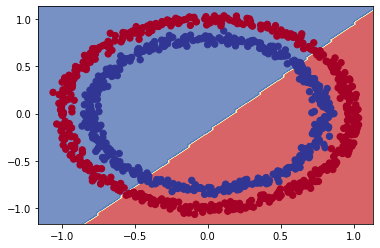

In [18]:
# Check ou the prediction our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [20]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regressio data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to regression model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

ValueError: ignored

Oh wait... we compiled our model for binary classification problem

But... we're now working on a regression problem, let's change the model to suit our data

In [75]:
# Set random seed

tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=1), tf.expand_dims(y_reg_train, axis=1), epochs=100, verbose=0)

In [76]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

2/2 [==============================] - 0s 5ms/step


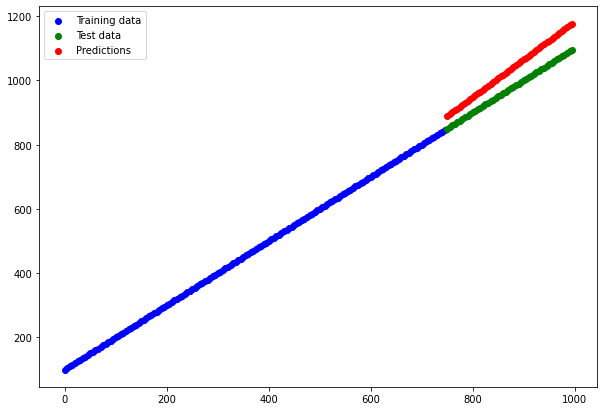

In [77]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing Piece: Non-linearity

In [78]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)


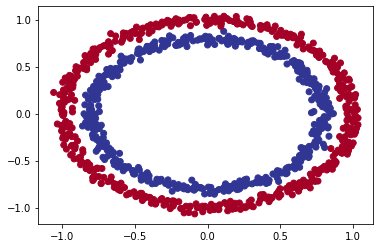

In [79]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


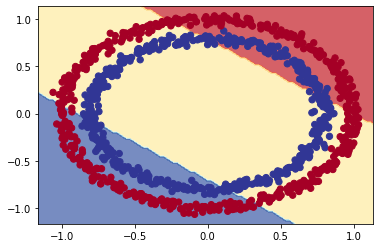

In [80]:
# check the decision boundary for our model_4

plot_decision_boundary(model=model_4, X=X, y=y);

Let's try build our first neural network with a non-linear activation function

In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3159 - accuracy: 0.4150
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2259 - accuracy: 0.4080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1216 - accuracy: 0.4200
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0396 - accuracy: 0.4310
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9891 - accuracy: 0.4380
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8570 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7960 - accuracy: 0.4560
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7600 - accuracy: 0.4550
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7255 - accuracy: 0.4560
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7140 - accuracy: 0.4550
Epoch 11/

In [82]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code

# Set the random seet
tf.random.set_seed(41)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Comple the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=5, verbose=0)

In [83]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


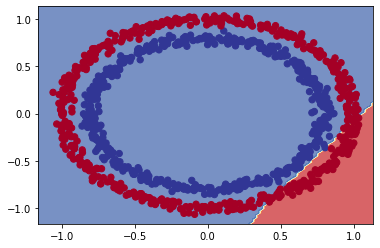

In [84]:
plot_decision_boundary(model_6, X, y)

In [85]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [86]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7490


[0.5536243915557861, 0.7490000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


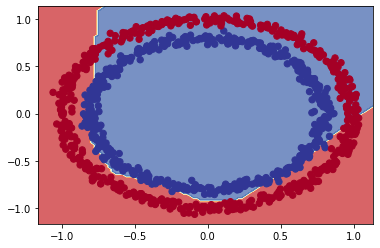

In [87]:
# Let's visualize our incredible
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint what data did the modek learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks

Now we've discussed the concepts of liner and non-linear functions (or lines), let's see them in action

In [88]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

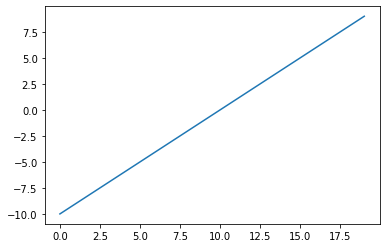

In [89]:
# Visualize our toy tensor
plt.plot(A)

In [90]:
# Lets' start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

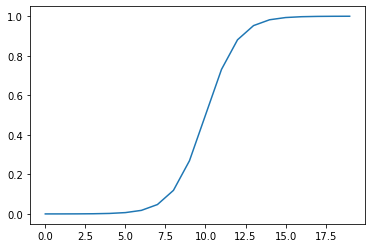

In [91]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [92]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)


# Pass our toy sensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

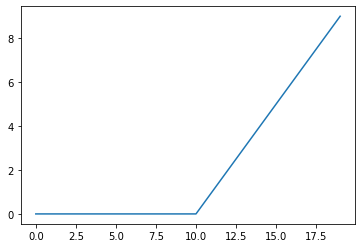

In [93]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [94]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

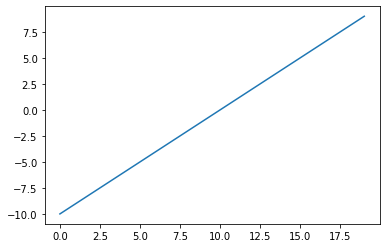

In [95]:
# Does the linear activation function change anything
plt.plot(tf.keras.activations.linear(A));

In [96]:
# Does A event change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin

So let's create a training and test set


In [97]:
# Check how many examples we have
len(X)

1000

In [98]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [99]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random set
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5150
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5263
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6425
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6438
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.5875
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7237
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7362
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7738
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [100]:
# Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9600


[0.15346737205982208, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


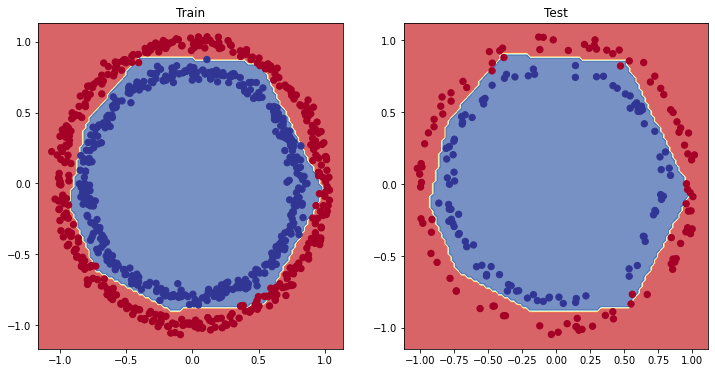

In [101]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

## Plot the loss (or training) curves

In [102]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692718,0.51500
1,0.685409,0.52625
2,0.677715,0.57625
3,0.668993,0.64250
4,0.659416,0.64375
5,0.645559,0.58750
6,0.628636,0.72375
7,0.610541,0.73625
8,0.584678,0.77375
9,0.556394,0.77375


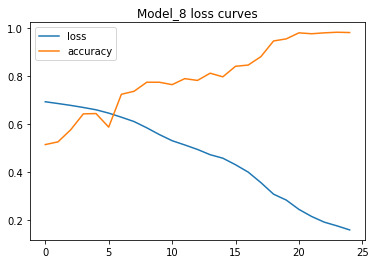

In [103]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting close ti the ground truth labels).

## Finding the best learning rate

To find the idea, learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think if a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here
* A modified loss curve plot

In [104]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)


# Fit the model passing lr_scheduler callback
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

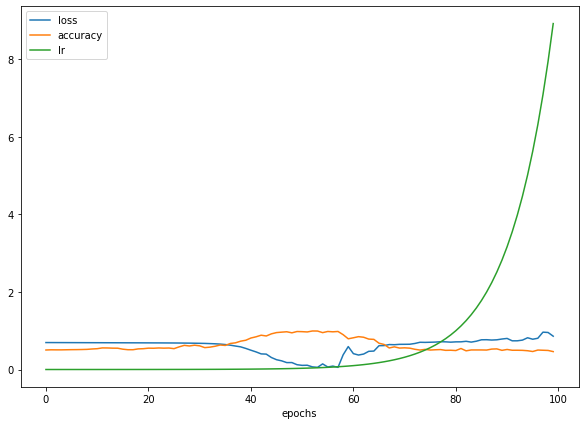

In [105]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

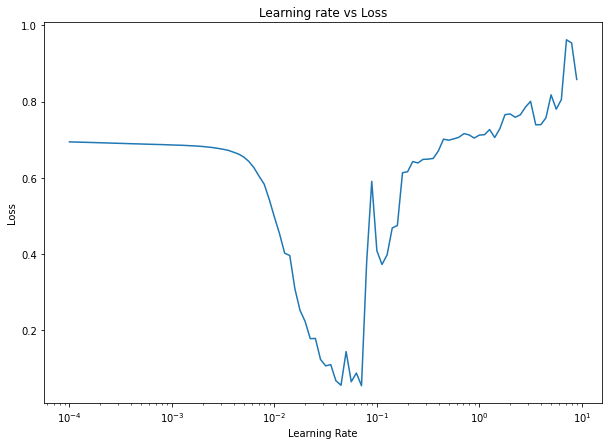

In [106]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7));
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

In [107]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [108]:
10**-3


0.001

In [109]:
# Let's try using a higher *ideal* learning rate with the same model as before

# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with ideal learning rate
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

# 3. Fit the model for 20 epochs (5 less than model 8)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4837
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5200
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5512
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5975
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6513
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6975
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7538
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8138
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8350
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8625
Epoch 11/20
25/25 [

In [110]:
# Evaluate the model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9700


[0.10178286582231522, 0.9700000286102295]

In [111]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9600


[0.15346737205982208, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


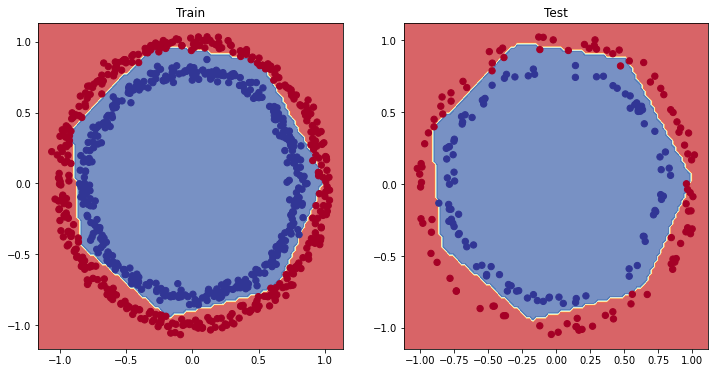

In [112]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## Classification evaluation methods 

key: tp = True Positive, tn = True Negative, fp = False Postive, fn = False Negative


|Metric Name|Metric Formula|Code|When to use|
|---|---|---|---|
|Accuracy| Accuracy = (tp + tn) / (tp + tn + fp + fn)| tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score() | Default metric for classification problems. Not the best imbalanced classes.|
|Precision| Precision = tp / (tp + fp) | tf.keras.metrics.Precision() or sklearn.metrics.precision_score()| Higher precision leads to less false positives.|
|Recall| Recall = tp / (tp + fn) | tf.keras.metrics.Recall() or sklearn.metrics.recall_score()| Higher recall leads to less false negatives|
|F1-score| F1-score = 2 * ((precision.recall)/(precision + recall))| sklearn.metrics.f1_score()| Combination of precision and recall usually a good overall metrics for a classification model|
|Confusion matrix| NA| custom function or sklearn.metrics.confusion_matrix()| When comparing predictions to truth labels to see where model gets confused. Cann be hard to use with large numbers of classes|

Along side visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with as above. Others include
* Classification report (from scikit learn) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [113]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy* 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9700
Model loss on the test set: 0.10178286582231522
Model accuracy on the test set: 97.00%


How about a confusion matrix?

In [114]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)


# Create confusion matrix
# confusion_matrix(y_test, y_preds)

# this raises ValueError: Classification metrics can't handle a mix of binary and continuous targets

7/7 [==============================] - 0s 2ms/step


In [115]:
y_test[:10]


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [116]:
y_preds[:10]

array([[0.9569685 ],
       [0.9569685 ],
       [0.9569685 ],
       [0.9569685 ],
       [0.8951169 ],
       [0.01055989],
       [0.9569685 ],
       [0.1447725 ],
       [0.9569685 ],
       [0.02455761]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form.. the standard output from the sigmoid or softmax activation functions

In [117]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [118]:
# Let's create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[95,  6],
       [ 0, 99]])

## How about we prettify our confusion matrix

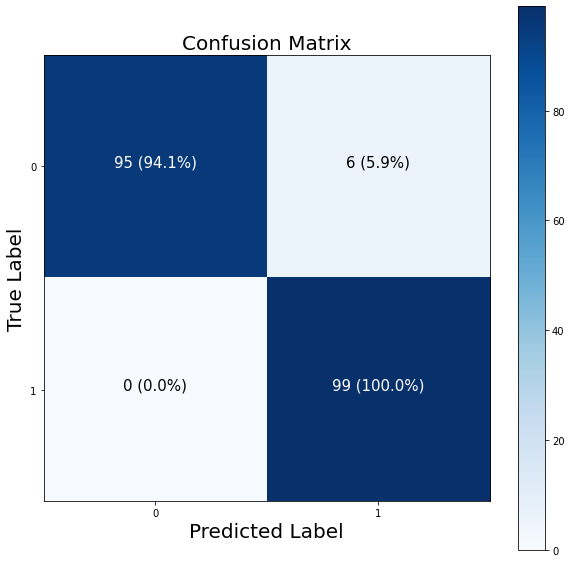

In [119]:
# Note:  the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(
    title="Confusion Matrix", 
    xlabel="Predicted Label", 
    ylabel="True Label", 
    xticks=np.arange(n_classes), 
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set the threshold
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [120]:
def plot_confusion_matrix(y_test, y_preds, classes = False):
  figsize = (10, 10)

  # create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(
      title="Confusion Matrix", 
      xlabel="Predicted Label", 
      ylabel="True Label", 
      xticks=np.arange(n_classes), 
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # set the threshold
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's know as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classfication.

To practice multi-class classification, we're going to build a neural network to classfiy images of different items of clothing.

In [121]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [122]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [123]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

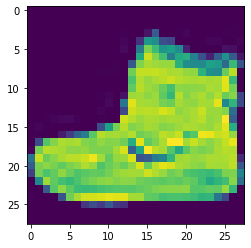

In [124]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

2

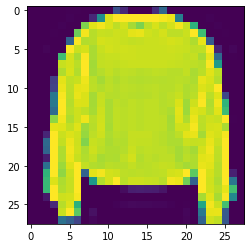

In [125]:
# Check out another sample img and label
plt.imshow(train_data[7]);

train_labels[7]

In [126]:
# Create a small list so we can index onto our training labelas so they are human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

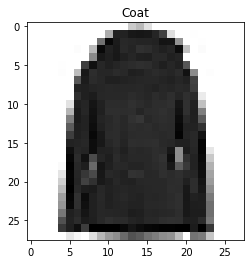

In [127]:
# Plot an example images and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

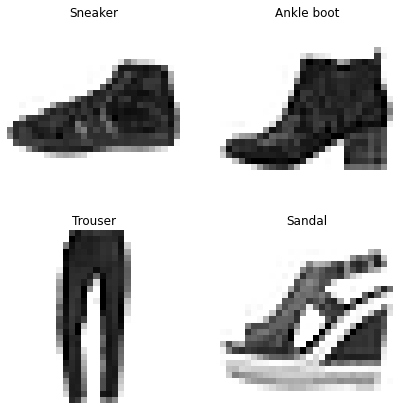

In [128]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);